## Mark Labinski
## Buan 6340 Problem Set 3

Dependencies:
- numpy
- pandas
- statsmodels
- seaborn
- matplotlib
<br>
<br>
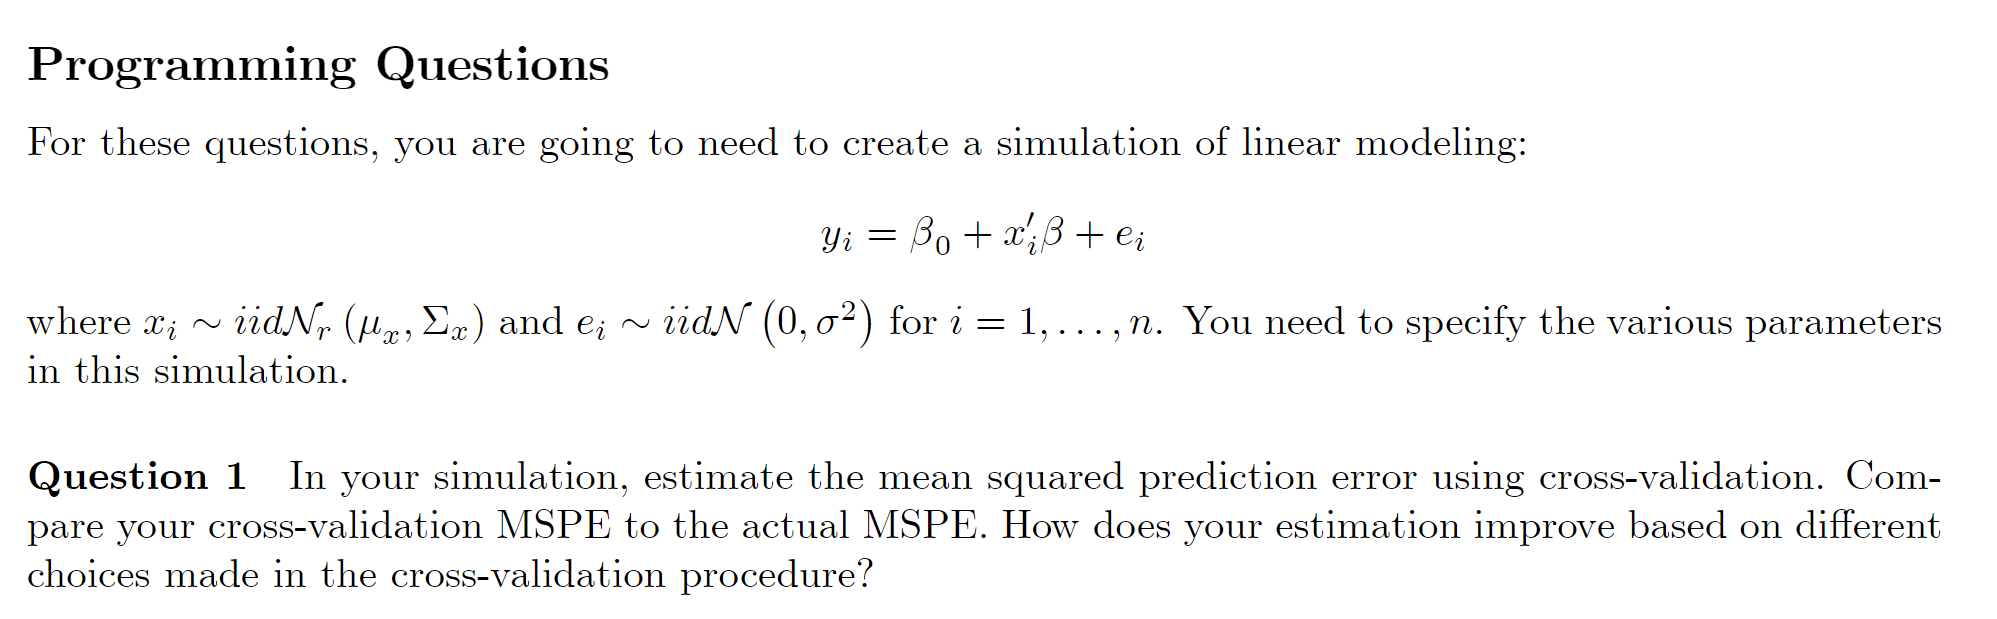

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
plt.style.use('ggplot')
os.chdir('C:/Users/markl/OneDrive/Documents/buan6340')

In [2]:
n_vec = [10,25,50,100,250] # number of instances
r_vec = [1,2,5]           # number of features

sigma = 0.5  # std deviation
mean = 15    # mean
nsim = 10    # number of simulations
k = 4        # number of cross validation folds

# Create holding places
actual_predictions = np.zeros((nsim, len(n_vec), len(r_vec)))
cv_predictions = np.zeros((nsim, len(n_vec), len(r_vec)))

# Define cross validation function
def cross_validate(n,k,xdata,ydata):
    np.random.seed(1)
    
    sample = np.random.permutation(n) 
    mspe_cross_validate = np.zeros(k)
    
    for j in range(k):    
        train_l = sample[:int((k-1-j)*n/k)]
        train_u = sample[int((k-j)*n/k):]
        train = np.concatenate((train_l,train_u),0)

        test = sample[int((k-1-j)*n/k):int((k-j)*n/k)]
        model = smf.OLS(ydata[train],xdata[train]).fit()
        mspe_cross_validate[j] = ((ydata[test]-model.predict(xdata[test]))**2).mean()
    mspe_avg_cross_validate = mspe_cross_validate.mean()
    
    return mspe_avg_cross_validate


  ########################
 #### Run Simulation ####
########################

for rdx,r in enumerate(r_vec):
    for ndx, n in enumerate(n_vec):
        for isim in range(nsim):

            ## beta vector generation
            b = np.ones(r+1)
            for j in range(1, r+1):
                b[j]=(float((1/(j+1))*4*(-1)**(j+1)))
            b = np.array(b).reshape(-1,1)

            # error term generation
            e = np.random.normal(0,sigma,size=(n,1))

            # features data generation
            x = np.ones((r,n))
            for ind in range(r):
                x[ind] = np.random.normal(mean,np.sqrt(n*mean), n)

            x0 = np.ones((1,n))
            X = np.concatenate((x0,x))
            xdata = X.T

            # target data generation
            y = np.ones((n,1))
            ydata = X.T.dot(b) + e

            sample = np.random.permutation(n)

            train =sample[0:int(n/2)] 
            test = sample[int(n/2):]
            xdata_a_train = xdata[train]
            ydata_a_train = ydata[train]
            model_a = smf.OLS(ydata_a_train,xdata_a_train).fit()
            mspe_actual = ((ydata[test]-model_a.predict(xdata[test]))**2).mean()
            actual_predictions[isim,ndx,rdx] = mspe_actual
            cv_predictions[isim,ndx,rdx] =  cross_validate(n,k,xdata,ydata)

            
  ######################
 #### Show Results ####           
######################

print(actual_predictions.mean(0))
print(cv_predictions.mean(0))

df_actual = pd.DataFrame(np.log(actual_predictions.mean(0)))
df_actual.columns = ['R=1','R=2','R=5']
df_cross_validate = pd.DataFrame(np.log(cv_predictions.mean(0)))
df_cross_validate.columns = ['R=1','R=2','R=5']
print(df_actual)

[[  572.65253074   328.0210365    658.6677097 ]
 [ 2889.39219197  3604.69963703  4620.78721975]
 [ 5564.39491757  5341.95065893 13308.37191186]
 [ 9027.10962503 12798.30305308 20418.00548895]
 [33779.77765483 47832.49678548 67960.04681088]]
[[  326.9742796    225.62686186   440.50672768]
 [ 3529.29514008  4893.56940165  4753.51449888]
 [ 5176.3036299   7899.92456394 10970.84917418]
 [ 8835.37858221 11861.07991899 20742.32399376]
 [31442.79288157 45557.44145044 63978.45983098]]
         R=1        R=2        R=5
0   6.350279   5.793078   6.490219
1   7.968801   8.189994   8.438320
2   8.624144   8.583346   9.496149
3   9.107988   9.457068   9.924172
4  10.427618  10.775461  11.126675


#### Results
Plot comparison of log(MSPE) values to show that cross-validation reduces the average MPSE and improves estimation. By increasing the number of cross validation folds, our estimations also improve.

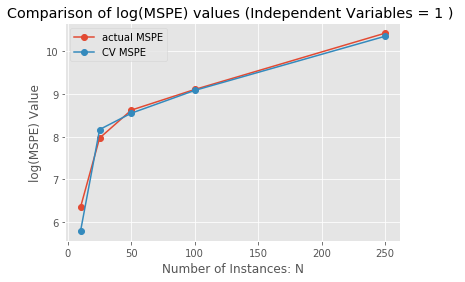

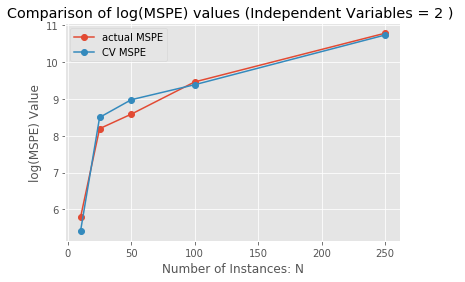

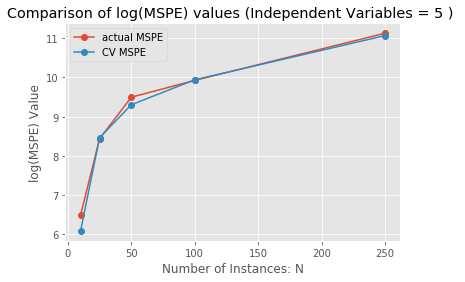

In [3]:
for i in range(3) : 
    fig = plt.figure()
    
    x = [10,25,50,100,250]
    y = df_actual.iloc[:,i] 
    y1 = df_cross_validate.iloc[:,i]
    plt.plot(x,y,'o-', label='actual MSPE' )
    plt.plot(x,y1,'o-', label='CV MSPE' )
    plt.title("Comparison of log(MSPE) values (Independent Variables = %i ) " %r_vec[i] )
    plt.xlabel("Number of Instances: N")
    plt.ylabel("log(MSPE) Value")
    plt.legend()
    plt.show()


<br>
<br>
<br>
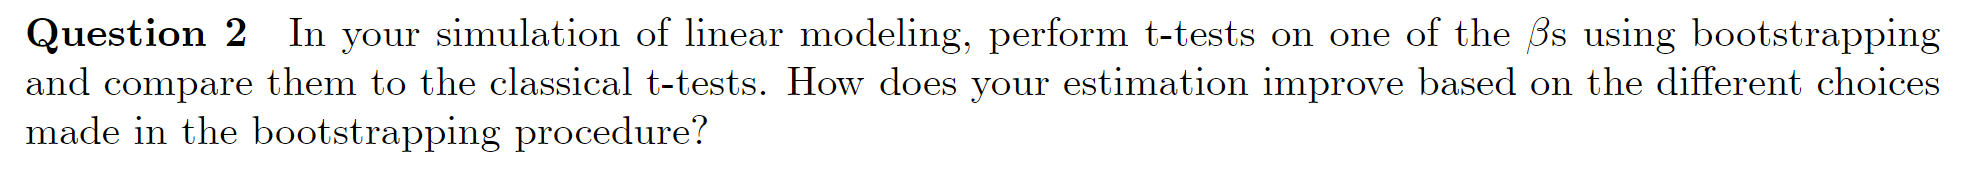

In [4]:
nsim = 100
bstar = np.zeros((nsim,r+1))  ## matrix to store the beta parameters
tvalues = np.zeros((nsim,r+1))  # matrix to store the t-values
mspe_bs = np.zeros(nsim)

for isim in range(nsim):
    sample =  np.random.randint(low=0,high=n,size=(n,))
    xxdata = xdata[sample]
    yydata = ydata[sample]
    model2 = smf.OLS(yydata,xxdata).fit()
    bstar[isim,:] = model2.params
    tvalues[isim,:] = model2.tvalues
    mspe_bs[isim] = ((ydata-model2.predict(xdata))**2).mean()
    
print(bstar[99,:])
print(tvalues[99,:])
print(mspe_bs)
model2.summary()


[ 1.01614193  2.00089461 -1.33336507  1.00020521 -0.80014033  0.66591386]
[   24.84154488  3434.31642542 -2467.56158353  1779.42741752
 -1390.1801121   1339.90270664]
[65577.76828473 65566.21528312 65557.18988347 65561.90731495
 65555.98671639 65592.25300138 65598.10312099 65578.66892812
 65548.068163   65569.6113     65571.59017279 65582.9362372
 65568.53502735 65575.22635072 65577.1356587  65572.49860482
 65566.37549113 65575.6097964  65582.0717163  65567.70132221
 65572.70090875 65568.54541761 65580.62840443 65562.18918089
 65576.85732432 65566.17016808 65569.76301083 65564.3325601
 65571.52925932 65571.15640321 65568.33229868 65568.84687762
 65554.56732872 65568.88026346 65552.02663679 65579.13046668
 65555.64099241 65565.00545397 65573.59405562 65583.29176083
 65578.18476117 65578.77628228 65585.45211163 65589.3549035
 65584.45745949 65555.2307948  65558.83527142 65558.70850905
 65547.76555482 65562.94960691 65567.78437442 65559.89630331
 65584.98503554 65588.35762931 65582.039251

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.765e+06
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:44:55   Log-Likelihood:                -184.82
No. Observations:                 250   AIC:                             381.6
Df Residuals:                     244   BIC:                             402.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0161      0.041     24.842      0.000       0.936       1.097
x1             2.0009      0.001   3434.316      0.000       2.000       2.002
x2            -1.3334      0.001  -2467.562      0.000      -1.334      -1.332
x3             1.0002      0.001   1779.427      0.000       0.999       1.001
x4            -0.8001      0.001  -1390.180      0.000      -0.801      -0.799
x5             0.6659      0.000   1339.903      0.000       0.665       0.667
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.356
Skew:                          -0.065   Prob(JB):                        0.837
Kurtosis:                       2.868   Cond. No.                         95.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.095e+06
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          1.83e-302
Time:                        22:44:56   Log-Likelihood:                -85.517
No. Observations:                 125   AIC:                             183.0
Df Residuals:                     119   BIC:                             200.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0456      0.051     20.614      0.000       0.945       1.146
x1             2.0006      0.001   2787.278      0.000       1.999       2.002
x2            -1.3333      0.001  -1770.328      0.000      -1.335      -1.332
x3             1.0008      0.001   1395.502      0.000       0.999       1.002
x4            -0.7996      0.001  -1027.676      0.000      -0.801      -0.798
x5             0.6660      0.001   1054.427      0.000       0.665       0.667
==============================================================================
Omnibus:                        0.089   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.053
Skew:                           0.046   Prob(JB):                        0.974
Kurtosis:                       2.961   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Results
Plot MSPE to show that bootstrapping reduces MSPE compared to classical t-testing.

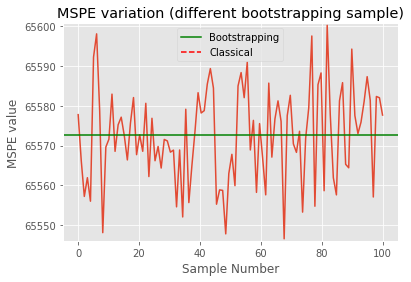

In [6]:
plt.figure()
x = np.linspace(0,nsim,nsim)
plt.plot(x,mspe_bs, '-')
plt.ylim(np.min(mspe_bs)-0.5,np.max(mspe_bs)+0.5)
plt.xlabel("Sample Number")
plt.ylabel("MSPE value")
plt.title("MSPE variation (different bootstrapping sample)")
plt.axhline(y=mspe_bs.mean(), color='g', linestyle='-',label='Bootstrapping')
plt.axhline(y=mspe_actual, color='r', linestyle='--',label='Classical')
plt.legend()
plt.show()

<br>
<br>
<br>
<br>
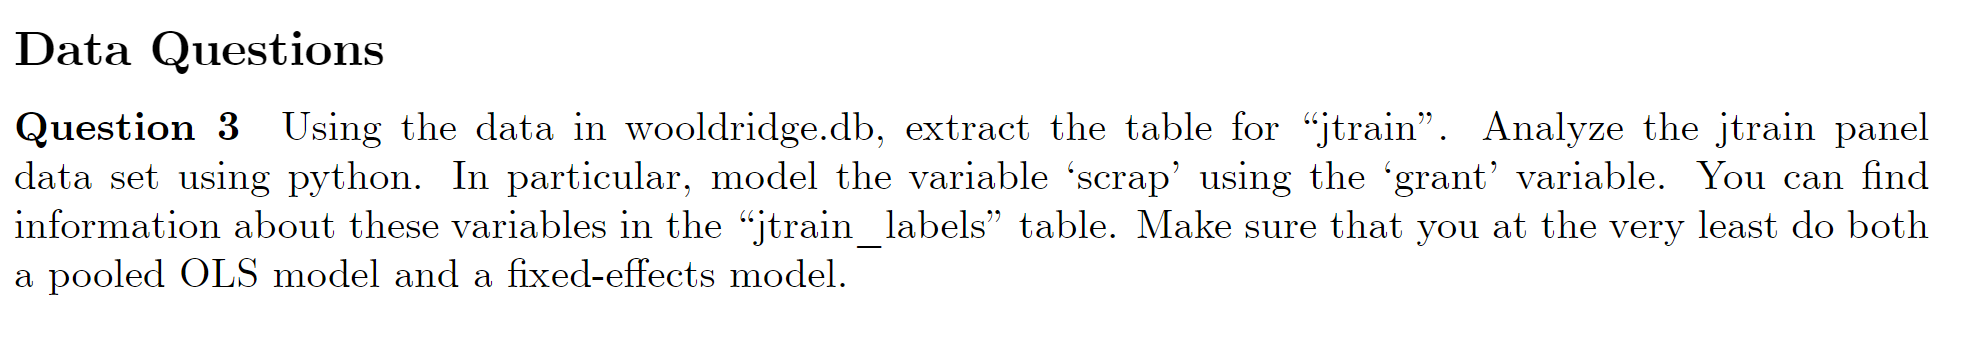

In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('wooldridge.db')
c = conn.cursor()
df = pd.read_sql_query('SELECT * from jtrain',conn)
df = df.drop('index',axis=1)
df.head(20)

,year,fcode,employ,sales,avgsal,scrap,rework,tothrs,union,grant,...,grant_1,clscrap,cgrant,clemploy,clsales,lavgsal,clavgsal,cgrant_1,chrsemp,clhrsemp
0,1987,410032,100.0,47000000.0,35000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,10.463100,NaN,NaN,NaN,NaN
1,1988,410032,131.0,43000000.0,37000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,0.270027,-0.088949,10.518670,0.055570,0.0,-8.946565,-1.165385
2,1989,410032,123.0,49000000.0,39000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,-0.063013,0.130621,10.571320,0.052644,0.0,0.198597,0.047832
3,1987,410440,12.0,1560000.0,10500.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,9.259130,NaN,NaN,NaN,NaN
4,1988,410440,13.0,1970000.0,11000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,0.080043,0.233347,9.305651,0.046520,0.0,0.000000,0.000000
5,1989,410440,14.0,2350000.0,11500.0,NaN,NaN,10.0,0,0,...,0,NaN,0,0.074108,0.176382,9.350102,0.044452,0.0,-2.000000,-0.167054
6,1987,410495,20.0,750000.0,17680.0,NaN,NaN,50.0,0,0,...,0,NaN,0,NaN,NaN,9.780190,NaN,NaN,NaN,NaN
7,1988,410495,25.0,110000.0,18720.0,NaN,NaN,50.0,0,0,...,0,NaN,0,0.223144,-1.919593,9.837348,0.057159,0.0,-17.500000,-0.606136
8,1989,410495,24.0,950000.0,19760.0,NaN,NaN,50.0,0,0,...,0,NaN,0,-0.040822,2.155982,9.891415,0.054067,0.0,21.666670,0.708895
9,1987,410500,200.0,23700000.0,13729.0,NaN,NaN,0.0,0,0,...,0,NaN,0,NaN,NaN,9.527266,NaN,NaN,NaN,NaN


In [8]:
# Clean dataset

def clean_df(df):
    df = df[['fcode','year','scrap','grant']]
    df = df.dropna()
    df = df.reset_index()
    df = df[['fcode','year','scrap','grant']]
    return df

df = clean_df(df)

In [9]:
## Pooled Model for panel data
Xdata_1 = df['grant']
Xdata_1 = sm.add_constant(Xdata_1)
model = smf.OLS(df['scrap'], Xdata_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  scrap   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4959
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.482
Time:                        22:45:03   Log-Likelihood:                -519.59
No. Observations:                 162   AIC:                             1043.
Df Residuals:                     160   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9991      0.522      7.665      0.000       2.969       5.030
grant         -0.8684      1.233     -0.704      0.482      -3.304       1.567
==============================================================================
Omnibus:                      102.343   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.246
Skew:                           2.562   Prob(JB):                     2.52e-96
Kurtosis:                       9.242   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
## Fixed Effect Model for Panel Data

Xfeatures= pd.concat((pd.DataFrame(np.kron(np.eye(54), np.ones((3,1)))), df['grant']),axis =1)
model2= sm.OLS(df['scrap'],Xfeatures).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  scrap   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     21.95
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           9.13e-39
Time:                        22:45:04   Log-Likelihood:                -318.05
No. Observations:                 162   AIC:                             746.1
Df Residuals:                     107   BIC:                             915.9
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0533      1.224      0.044      0.965      -2.374       2.480
1              2.6400      1.224      2.156      0.033       0.213       5.067
2              6.0000      1.224      4.901      0.000       3.573       8.427
3             10.8000      1.224      8.821      0.000       8.373      13.227
4              5.5000      1.224      4.492      0.000       3.073       7.927
5              0.5933      1.224      0.485      0.629      -1.834       3.020
6              1.6300      1.224      1.331      0.186      -0.797       4.057
7             24.6667      1.224     20.147      0.000      22.240      27.094
8              1.0000      1.224      0.817      0.416      -1.427       3.427
9              6.6667      1.224      5.445      0.000       4.240       9.094
10             0.4633      1.224      0.378      0.706      -1.964       2.890
11             0.8000      1.224      0.653      0.515      -1.627       3.227
12             0.7400      1.224      0.604      0.547      -1.687       3.167
13             1.0767      1.224      0.879      0.381      -1.350       3.504
14             0.0533      1.224      0.044      0.965      -2.374       2.480
15             0.1767      1.224      0.144      0.886      -2.250       2.604
16             5.2511      1.235      4.252      0.000       2.803       7.699
17             1.2511      1.235      1.013      0.313      -1.197       3.699
18             4.9178      1.235      3.982      0.000       2.470       7.366
19             2.0000      1.224      1.634      0.105      -0.427       4.427
20             0.7345      1.235      0.595      0.553      -1.713       3.182
21             1.5011      1.235      1.216      0.227      -0.947       3.949
22             1.5178      1.235      1.229      0.222      -0.930       3.966
23             0.9445      1.235      0.765      0.446      -1.503       3.392
24             2.2511      1.235      1.823      0.071      -0.197       4.699
25             3.3878      1.235      2.743      0.007       0.940       5.836
26             1.6711      1.235      1.353      0.179      -0.777       4.119
27             0.8978      1.235      0.727      0.469      -1.550       3.346
28             0.7845      1.235      0.635      0.527      -1.663       3.232
29             0.8045      1.235      0.651      0.516      -1.643       3.252
30             5.0845      1.235      4.117      0.000       2.637       7.532
31             7.7511      1.235      6.277      0.000       5.303      10.199
32             0.1067      1.224      0.087      0.931      -2.320       2.534
33            18.5845      1.235     15.050      0.000      16.137      21.032
34             0.4745      1.235      0.384      0.702      -1.973       2.922
35             5.5845      1.235      4.522      0.000       3.137       8.032
36